# Deep Learning challenge

In [94]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


This challenge is split into 2 independent parts:
1. CNN challenge - Face to Age
2. RNN challenge - Sentiment Analysis of Movies Reviews

## 1. CNN challenge - Face to Age

### Objectives
-  Visualize images
-  Preprocess images for Neural Networks
-  Fit a custom CNN for a regression task
-  Fine-tune an analyse model performance

### 1.1 Visualize images

**👉 Load the dataset (200 Mo)**

In [174]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification/face_to_age/images.csv")
data = data.sample(frac=1, random_state=0).reset_index(drop=True)
data

,age,pixels
0,45,200 168 96 107 123 132 132 135 135 134 134 137...
1,1,223 226 231 234 236 238 238 240 240 240 240 23...
2,35,23 29 24 29 47 71 110 141 166 169 169 174 179 ...
3,28,9 6 11 12 30 65 82 37 47 16 27 26 32 74 141 16...
4,24,67 66 63 59 61 62 60 66 83 103 139 173 192 194...
...,...,...
23700,35,48 47 52 66 78 89 96 104 117 127 139 142 149 1...
23701,55,101 107 110 114 118 120 127 129 132 137 139 14...
23702,28,161 134 113 114 98 93 92 90 82 58 23 45 85 105...
23703,3,65 82 84 129 141 116 43 46 54 71 58 60 64 66 7...


Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

**❓ Plot the histogram of age in your dataset.**

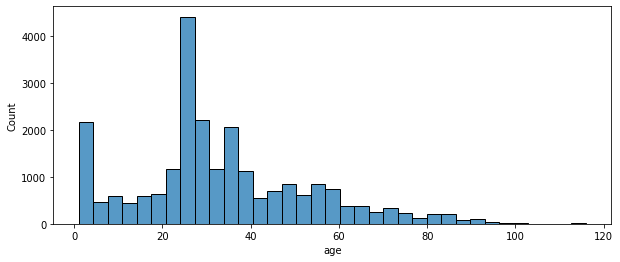

In [5]:
# without kde : kernel density estimation
plt.figure(figsize = (10, 4))
sns.histplot(data.age, kde = False, bins = 35); # kde : density estimation

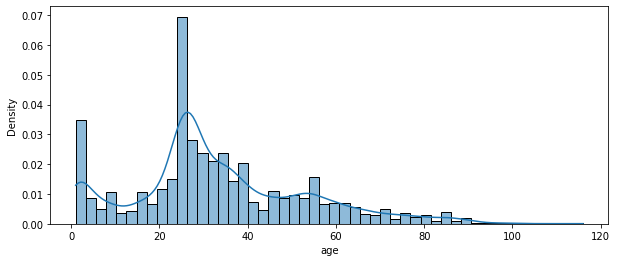

In [7]:
# with kde : kernel density estimation
plt.figure(figsize = (10, 4))
sns.histplot(data.age, bins = 50, stat = "density", kde = True);

**❓ Visually display one image of your choice.**

In [8]:
data.shape

(23705, 2)

In [12]:
data.dtypes

age        int64
pixels    object
dtype: object

In [175]:
# Transform string in pixels column
def transform(string):
    res = []
    L = string.split()
    for i in L:
        res.append(int(i))
    return np.array(res)

In [176]:
data.pixels = data.pixels.map(transform)

In [177]:
for i in range(data.pixels.values.shape[0]):
    data.pixels[i] = (data.pixels[i]).reshape(48, 48)

/var/folders/5y/6hfgq7bn3rxfh24y7vqbgg7w0000gn/T/ipykernel_10086/328912168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.pixels[i] = (data.pixels[i]).reshape(48, 48)


In [178]:
((data.pixels.loc[0])).shape

(48, 48)

In [179]:
img = (data.pixels.loc[1])
img.shape

(48, 48)

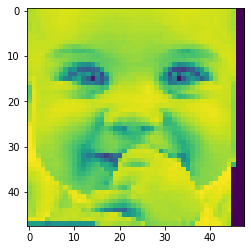

In [180]:
plt.imshow(img)

**❓ What is the physical characteristic of the image at _index_ `60`?**

- Store in the 3 boolean variables `smile`/`glasses`/`hat` the values `True` if the person smiles/wears glasses/has a hat, `False` else.

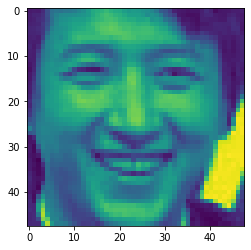

In [181]:
k = 60
plt.imshow(data.pixels.loc[k])

In [182]:
# Store your result in the variable below

smile = True
glasses = False
hat = False

#### 💾 Save your results

Run the cell below to save your results.

In [183]:
from nbresult import ChallengeResult
result = ChallengeResult('images_visualization',
                         smile=smile,
                         glasses=glasses,
                         hat=hat)
result.write()

### 1.2 Processing

**❓ Your goal is to train a convolutional neural network model to predict the _age_ of a person based solely on a picture of his/her face.**
- Create your **feature matrix** `X` as `ndarray` scaled between 0 and 1
- Create your **target vector** `y` as `ndarray`
- Create your holdout sets: 4 variables (`X_train`, `y_train`) and (`X_test`, `y_test`) keeping the **first** `70%` as the train set
- `X` and `y` shapes should fit a CNN (`model.fit(X,y)`)

😌 Don't worry, you will be given the solution in the next question in case you don't make it

In [184]:
y = data['age']
y.shape

(23705,)

In [185]:
X = data['pixels']

G = np.zeros((23705, 48, 48))

for i in range(G.shape[0]):
    G = np.concatenate( (G, X[i].reshape(1, 48, 48)) )

KeyboardInterrupt: 

In [ ]:
G.shape

In [ ]:
X = G
scaler = MinMaxScaler() # scaled between 0 and 1
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#### 💾 Save your results

Run the cell below to save your results.

In [220]:
from nbresult import ChallengeResult
result = ChallengeResult('images_processing', 
                         X_train_shape = X_train.shape,
                         y_train_shape = y_train.shape,
                         first_image = X_train[0]
                        )
result.write()

### 1.3 Modeling the age of a face

👉 **Only if you haven't managed to create your training sets above**, you can start back from the solution by running the cell below 
- ⚠️ This will download ~500Mo of `.pickle` files on your current working directory
- Then it will load them into 4 ndarrays in memory, and it should delete initial .pickles from your disk

In [95]:
import pickle

def download_solutions():
    file_names = ["images_X_train.pickle", "images_X_test.pickle", "images_y_train.pickle", "images_y_test.pickle"]
    base_url = "https://wagon-public-datasets.s3.amazonaws.com/certification/face_to_age/"
    pickles = dict()

    for file_name in file_names:
        url = f"{base_url + file_name}"
        file_path = f"data/images/{file_name}"
        command = f"curl --output {file_path} {url}"
        ! eval {command}
        with open(file_path, 'rb') as handle:
            pickles[file_name] = pickle.load(handle)
        command = f"rm {file_path}"
        ! eval {command}
        
    return pickles

# UNCOMMENT THIS LINE BELOW TO GET THE CORRECTION IF NEEDED
# X_train, X_test, y_train, y_test = download_solutions().values()

❓ **Before training a complex model, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "naive" case where you always predict mean age
- Store the result under `score_baseline`

In [97]:
solution = download_solutions()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  291M  100  291M    0     0  1967k      0  0:02:31  0:02:31 --:--:-- 4024k   0  0:00:48 --:--:--  0:00:48 6100k   0  1529k      0  0:03:15  0:00:42  0:02:33 1042k0:02:13 1811k   0     0  1519k      0  0:03:16  0:01:50  0:01:26 1795k    0  0:03:09  0:01:59  0:01:10 2683k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  124M  100  124M    0     0  1688k      0  0:01:15  0:01:15 --:--:-- 1059k1:25  0:00:27  0:00:58  929k  0     0  1363k      0  0:01:33  0:00:48  0:00:45 1110k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129k  100  129k    0     0   4300      0 --:--:-- --:--:-- --:--:--     0k      0 -

In [98]:
type(solution)

dict

In [100]:
solution.keys()

dict_keys(['images_X_train.pickle', 'images_X_test.pickle', 'images_y_train.pickle', 'images_y_test.pickle'])

In [146]:
X_train = solution['images_X_train.pickle']
X_test = solution['images_X_test.pickle']
y_train = solution['images_y_train.pickle']
y_test = solution['images_y_test.pickle']

In [147]:
X_train.shape

(16594, 48, 48, 1)

In [148]:
y_pred = np.mean(y_train)
print(f'The mean prediction is {y_pred:.3f}')
absolute_error = [np.abs(y - y_pred) for y in y_test]
score_baseline = np.mean(absolute_error)

The mean prediction is 33.105


In [149]:
score_baseline

15.377547050153435

❓ **Build and fit a convolutional neural network**

- Name it `model`
- Store output of `.fit()` in a variable `history`
- Do not use transfer learning
- Make sure your model does not overfit with appropriate control techniques

💡 Manage wisely your training time. You should obtain significantly better performance than the baseline in less than 5 minutes with average processor and no graphic cards. 

In [156]:
from tensorflow.keras import layers
from tensorflow.keras import models

def initialize_model():
    
    model = models.Sequential()
    
    ### First convolution & max-pooling
    model.add(layers.Conv2D(32, kernel_size=(4,4),padding='same', input_shape=X_train.shape[1:]))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
        
    ### Second convolution & max-pooling
    model.add(layers.Conv2D(32, kernel_size=(3,3),padding='same', activation='relu')) # kernel_size = 3 <==> (3, 3)
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())
    ### One fully connected
    model.add(layers.Dense(100, activation='relu'))
    
    ### Last layer 
    model.add(layers.Dense(1, activation='linear')) # predicting the age
    
    
    return model

In [157]:
def compile_model(model, optimizer_name):
    
    model.compile(loss='mse', 
                  optimizer= optimizer_name,
                  metrics = 'mae')
    
    return model

In [159]:
from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model()
model = compile_model(model, 'rmsprop')


es = EarlyStopping(patience=2)

history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    batch_size=32,
                    epochs=7, 
                    callbacks=[es], verbose=1)

Epoch 1/7
363/363 [==============================] - 29s 78ms/step - loss: 380.0817 - mae: 14.9429 - val_loss: 260.8020 - val_mae: 13.0173
Epoch 2/7
363/363 [==============================] - 29s 79ms/step - loss: 242.4512 - mae: 11.8801 - val_loss: 234.4615 - val_mae: 11.2931
Epoch 3/7
363/363 [==============================] - 30s 83ms/step - loss: 197.4476 - mae: 10.5961 - val_loss: 285.0039 - val_mae: 13.7978
Epoch 4/7
363/363 [==============================] - 28s 76ms/step - loss: 169.5522 - mae: 9.6863 - val_loss: 158.1753 - val_mae: 9.5286
Epoch 5/7
363/363 [==============================] - 30s 84ms/step - loss: 150.7820 - mae: 9.1495 - val_loss: 145.8609 - val_mae: 8.9950
Epoch 6/7
363/363 [==============================] - 31s 86ms/step - loss: 137.2670 - mae: 8.6864 - val_loss: 131.7321 - val_mae: 8.4958
Epoch 7/7
363/363 [==============================] - 31s 87ms/step - loss: 126.0721 - mae: 8.3001 - val_loss: 135.5601 - val_mae: 8.3812


❓ **Plot your training and validation MAE at each epoch using the cell below**

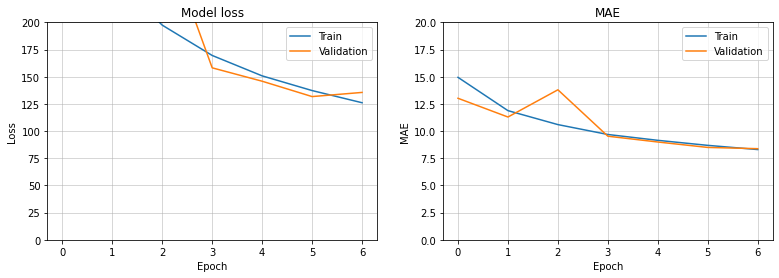

<Figure size 432x288 with 0 Axes>

In [160]:
# Plot below your train/val loss history
# -------------------------------------------------- # 


def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()
    
plot_loss_mae(history)

# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
fig.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Store your test score as `score_test`

In [161]:
score_test = model.evaluate(X_test, y_test)

223/223 [==============================] - 4s 19ms/step - loss: 139.9096 - mae: 8.3949


In [162]:
score_test

[139.90956115722656, 8.394854545593262]

In [163]:
print(f"Loss (MSE) value: {score_test[0]:.4f} - Score (MAE) value : {score_test[1]:.4f}")

Loss (MSE) value: 139.9096 - Score (MAE) value : 8.3949


#### 💾 Save your results

Run the cell below to save your results.

In [164]:
from nbresult import ChallengeResult
import tensorflow as tf

result = ChallengeResult(
    "cnn",
    input_shape = list(model.input.shape),
    output_shape = list(model.output.shape),
    layer_names = [layer.name for layer in model.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in model.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()

## 2. RNN challenge - Binary Sentiment Analysis of French Movie Reviews

### 2.1 Data Preparation (given)

Our dataset contains 30,000 french reviews of movies, along with the binary class 1 (positive) or 0 (negative) score

In [186]:
# We load the dataset for you
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/certification/movies_reviews/movies_reviews.csv')
data.head()

,review,polarity
0,Ça commence à devenir énervant d'avoir l'impre...,0
1,"J'ai aimé ce film, si il ressemble a un docume...",1
2,Une grosse merde ce haneke ce faire produire p...,0
3,"Beau mélodrame magnifiquement photographié, ""V...",1
4,A la poursuite du diamant vers est un film pro...,1


In [187]:
# We create features
y = data.polarity
X = data.review

# We analyse class balance
print(pd.value_counts(y))

1    15051
0    14900
Name: polarity, dtype: int64


In [188]:
# We check the first review
print(f'polarity: {y[0]} \n')
print(X[0])

polarity: 0 

Ça commence à devenir énervant d'avoir l'impression de voir et revoir le même genre de film à savoir : la comédie romantique, surement le genre le plus prolifique de le production française actuelle. Le problème c'est que l'on a souvent affaire à des niaiseries de faible niveau comme celui ci. Avec un scenario ultra balisé et conventionnel, c'est à se demander comment ça peut passer les portes d'un producteur. Bref cette sempiternel histoire d'un homme mentant au nom de l'amour pour reconquérir une femme et qui à la fin se prend son mensonge en pleine figure est d'une originalité affligeante, et ce n'est pas la présence au casting de l'ex miss météo Charlotte Le Bon qui rêve surement d'avoir la même carrière que Louise Bourgoin qui change la donne.


#### Text Cleaning

We performed the following data cleaning for you:
- We replaced french accents by their non-accentuated equivalent
- We reduced all uppercases to lowercases
- We removed any characters outside of a-z

Below you can visualize the cleaned dataset:

In [189]:
X_clean = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification/movies_reviews/movies_reviews_clean.csv")['review']
X_clean[0]

'ca commence a devenir enervant de voir et revoir le meme genre de film a savoir la comedie romantique surement le genre le plus prolifique de le production francaise actuelle le probleme que a souvent affaire a des niaiseries de faible niveau comme celui ci avec un scenario ultra balise et conventionnel a se demander comment ca peut passer les portes producteur bref cette sempiternel histoire homme mentant au nom de pour reconquerir une femme et qui a la fin se prend son mensonge en pleine figure est originalite affligeante et ce pas la presence au casting de miss meteo charlotte le bon qui reve surement la meme carriere que louise bourgoin qui change la donne'

#### Text preprocessing

Then we performed the following preprocessing for you:
- We converted each review into a list of integers, each integer representing a _unique_ word from the corpus

- We padded every sequences with a maximum length of 100, replacing missing words by `0` at the end

- For example, the sentence: `"this was good"` is converted into something like `array([1, 3, 18, 0, 0, 0, ...0], dtype=int32)` 

Below you can visualize the preprocessed dataset:

In [190]:
!curl 'https://wagon-public-datasets.s3.amazonaws.com/certification/movies_reviews/movies_reviews_preproc.csv' --output "data/movies_reviews_preproc.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 71.4M  100 71.4M    0     0  4506k      0  0:00:16  0:00:16 --:--:-- 4296k


In [191]:
X_preproc = np.genfromtxt("data/movies_reviews_preproc.csv", delimiter=',', dtype='int32')
print(X_preproc.shape)
X_preproc[0]

(29951, 100)


array([15, 16, 17, 18, 10, 12, 10, 19, 20,  6, 10, 21, 22, 23, 10, 24, 25,
        3, 26, 27,  3, 28, 29,  6, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        8, 40,  3, 41, 42, 43,  1, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56,  6, 57, 58, 59, 60,  8, 61,  3, 15, 62, 41, 63, 64, 65,
       66, 67, 68, 69, 70, 71,  8, 72, 73, 15, 74, 55, 75,  6, 76, 77, 78,
       10, 79, 61, 80, 18, 15, 11, 81, 25, 82, 83, 61, 84, 15, 85],
      dtype=int32)

Here is the dictionary used to translate words into integers:

In [192]:
!curl "https://wagon-public-datasets.s3.amazonaws.com/certification/movies_reviews/movies_reviews_word_to_integer.pickle" --output "data/word_to_integer.pickle"
import pickle

with open('data/word_to_integer.pickle', 'rb') as handle:
    word_to_id = pickle.load(handle)

word_to_id

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  848k  100  848k    0     0  2007k      0 --:--:-- --:--:-- --:--:-- 2010k


{'ca': 1,
 'commence': 2,
 'a': 3,
 'devenir': 4,
 'enervant': 5,
 'de': 6,
 'voir': 7,
 'et': 8,
 'revoir': 9,
 'le': 10,
 'meme': 11,
 'genre': 12,
 'film': 13,
 'savoir': 14,
 'la': 15,
 'comedie': 16,
 'romantique': 17,
 'surement': 18,
 'plus': 19,
 'prolifique': 20,
 'production': 21,
 'francaise': 22,
 'actuelle': 23,
 'probleme': 24,
 'que': 25,
 'souvent': 26,
 'affaire': 27,
 'des': 28,
 'niaiseries': 29,
 'faible': 30,
 'niveau': 31,
 'comme': 32,
 'celui': 33,
 'ci': 34,
 'avec': 35,
 'un': 36,
 'scenario': 37,
 'ultra': 38,
 'balise': 39,
 'conventionnel': 40,
 'se': 41,
 'demander': 42,
 'comment': 43,
 'peut': 44,
 'passer': 45,
 'les': 46,
 'portes': 47,
 'producteur': 48,
 'bref': 49,
 'cette': 50,
 'sempiternel': 51,
 'histoire': 52,
 'homme': 53,
 'mentant': 54,
 'au': 55,
 'nom': 56,
 'pour': 57,
 'reconquerir': 58,
 'une': 59,
 'femme': 60,
 'qui': 61,
 'fin': 62,
 'prend': 63,
 'son': 64,
 'mensonge': 65,
 'en': 66,
 'pleine': 67,
 'figure': 68,
 'est': 69,
 'orig

Finally, we holdout for you a test set

In [193]:
idx_split = round(len(X_preproc)*0.7)

X_train = X_preproc[0:idx_split]
y_train = y[0:idx_split]
X_test = X_preproc[idx_split:]
y_test = y[idx_split:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20966, 100) (20966,) (8985, 100) (8985,)


### 2.2 Modeling Sentiment Score

❓ **Before training a complex model, evaluate your baseline score**
- We will use the _accuracy_ as performance metric in this challenge
- What would be your baseline score?
- Store the result under `score_baseline`

In [200]:
data.polarity.nunique()

2

In [201]:
score_baseline = 1/2

❓ **Build and fit a neural network**

- Name it `model`
- Store output of `.fit()` in a variable `history`
- You **cannot** use transfer learning nor any other pre-trained models
- You must use a **Recurrent** architecture to _capture_ a notion of order in the sentences' words
- Make sure your model does not overfit with appropriate control techniques
- You don't need to cross-validate your model. Simply hold-out a validation set as you see fit
- Manage wisely your training time

💡 You will not be judged by the computing power of your computer, but you should obtain significantly better performance than the baseline in less than 5 minutes without GPUs

In [210]:
data['review'].shape

(29951,)

❓ **Plot your training and validation Accuracy at each epoch using the cell below**

In [199]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
fig.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Store your test score as `score_test`

In [201]:
# YOUR CODE HERE

#### 💾 Save your results

Run the cell below to save your results.

In [202]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "rnn",
    input_shape = list(model.input.shape),
    output_shape = list(model.output.shape),
    layer_names = [layer.name for layer in model.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in model.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()